<a href="https://colab.research.google.com/github/ajmbarron/web_scraping_with_python-/blob/main/Chapter_3_Writing_Web_Crawlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Traversing a single domain ##

from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())

## getLinks: takes in a Wikipedia article URL of the form /wiki/<Article_Name> and returns a list of all
## linked article URLs in the same form. 

def getLinks(articleUrl):
  html = urlopen('http://en.wikipedia.org{}'.format(articleUrl))
  bs = BeautifulSoup(html, 'html.parser')
  return bs.find('div', {'id':'bodyContent'}).find_all('a', href=re.compile('^(/wiki/)((?!:).)*$'))

## A main function that calls getLinks with a starting article, chooses a random
## article link from the returned list, and calls getLinks again,
## until you stop the program or until no article links are found on the new page.

links=getLinks('/wiki/Kevin_Bacon')
while len(links) > 0:
  newArticle=links[random.randint(0, len(links)-1)].attrs['href']   # the href attribute specifies the URL of the page the link goes to
  print(newArticle)
  links=getLinks(newArticle)

In [ ]:
## Function to get all links references inside an specific url ##

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set()
def getLinks(pageUrl):
  global pages
  html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
  bs = BeautifulSoup(html, 'html.parser')
  for link in bs.find_all('a', href=re.compile('^(/wiki/)')):  # this line finds all the links that begins with '/wiki' 
      if 'href' in link.attrs:
          if link.atrrs['href'] not in pages:
             # We have encountered a new page
              newPage = link.attrs['href']
              print(newPage)
              pages.add(newPage)
              getLinks(newPage)

#getLinks('')


In [ ]:
# Scraper that collects the title, 
# the first paragraph of content,
# and the link to edit the page (if available)

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

def getLinks(pageUrl):
  global pages
  html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
  bs = BeautifulSoup(html, 'html.parser')
  try:
    print(bs.h1.get_text())   # collects the title
    print(bs.find(id='mw-content-text').find_all('p')[0])   # collects the first paragraph (tag is 'mw-content-text')
    print(bs.find(id='ca-edit').find('span').find('a').attrs['href'])   # collects the link to edit the page
  except AttributeError:
    print('This page is missing something! Continuing.')  # print this in case the tag is missing on html
  
  ## for loop to add info for new urls inside the initial html ##
  for link in bs.find_all('a', href=re.compile('^(/wiki/')):   # for all the links starting with /wiki/
    if 'href' in link.attrs:
      if link.attrs['href'] not in pages:
        # We have encountered a new page
        print('-'*20)
        print(newPage)
        pages.add(newPage)
        getLinks(newPage)



#getLinks()


# Handling redirecting links 
# to avoid the crawler to break it is necessary to avoid redirecting links 
# inside urls.

# r = requests.get('http://github.com', allow_redirects=False)



**Flowchart for script that crawls through sites on the internet**
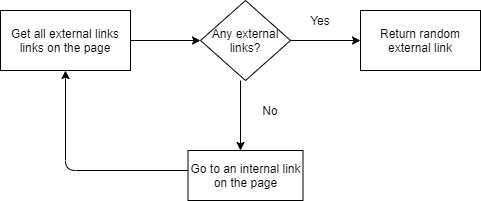


In [ ]:
## Builiding web scraper for different functions ##
from urllib.request import Request, urlopen
from urllib.request import urlopen
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import re
import datetime
import random

pages = set()
random.seed(datetime.datetime.now())

# Retrieves a list of all internal links found on a page

def getInternaLinks(bs, includeUrl):
  includeUrl='{}://{}'.format(urlparse(includeUrl).scheme, urlparse(includeUrl).netloc)
  internalLinks=[]

  # Finds all links that begin with a '/'

  for link in bs.find_all('a', href=re.compile('^(/|.*'+includeUrl+')')):
    if link.attrs['href'] is not None:
      if link.attrs['href'] not in internalLinks:
        if(link.attrs['href'].startswith('/')):
          internalLinks.append(includeUrl+link.attrs['href'])
    else:
            internalLinks.append(link.attrs['href'])
    return internalLinks

# Retrieves a list of external links found on a page #

def getExternalLinks(bs, excludeUrl):
    externalLinks = []
    # Finds all links with 'http' or 'www' that do
    # not contain the current URL
    for link in bs.find_all('a', href=re.compile('^(http|www)((?!'+excludeUrl+').)*$')):
      if link.attrs['href'] is not None:
        if link.attrs['href'] not in externalLinks:
          externalLinks.append(link.attrs['href'])
    return externalLinks

def getRandomExternalLink(startingPage):
    req=Request(startingPage, headers={'User-Agent': 'Mozilla/5.0'})
    web_byte = urlopen(req).read()
    html = web_byte.decode('utf-8')
    bs = BeautifulSoup(html, 'html.parser')
    externalLinks=getExternalLinks(bs, urlparse(startingPage).netloc)
    if len(externalLinks) == 0:
      print('No external links, looking around the site for one')
      domain='{}:{}'.format(urlparse(startingPage).scheme, urlparse(startingPage).netloc)
      return getRandomExternalLink(internalLinks[random.randint(0, 
                                                 len(internalLinks)-1)])
    else:
      return externalLinks[random.randint(0, len(externalLinks)-1)]

def followExternalOnly(startingSite):
    externalLink=getRandomExternalLink(startingSite)
    print('Random external link is: {}'.format(externalLink))
    followExternalOnly(externalLink)   


followExternalOnly('https://www.salario.com.br/')


Random external link is: https://twitter.com/SalarioBrasil


HTTPError: ignored

**Flow diagram for the website crawler that collects all external links**
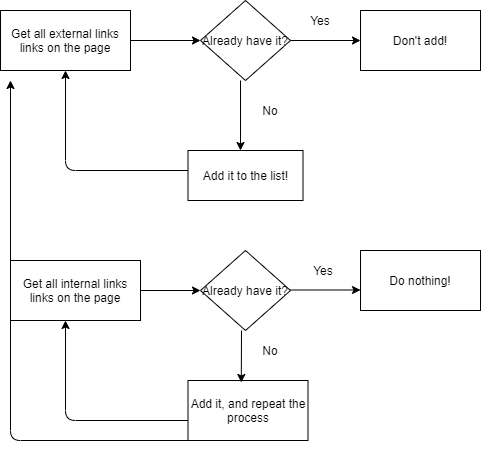

In [ ]:
from urllib.request import urlopen
from urllib.parse import urlparse
from bs4 import BeautifulSoup
from urllib.error import URLError
from urllib.error import HTTPError

def getAllExternalLinks(siteUrl):
        try:
          html= urlopen(siteUrl)
        except HTTPError as e:
           print(e)    # not found url 
        except URLError as e:
           print('The server could not be found!') # server not found
        except AttributeError as e:
           return None     # tag not found
        else:
         domain='{}://{}'.format(urlparse(siteUrl).scheme, urlparse(siteUrl).netloc)
         bs=BeautifulSoup(html, 'html.parser')
         internalLinks=getInternalLinks(bs, domain)
         externalLinks=getExternalLinks(bs, domain)
  
         for link in externalLinks:
              if link not in allExtLinks:
                 allExtLinks.add(link)
                 print(link)

         for link in internalLinks:
              if link not in allIntLinks:
                allIntLinks.add(link)
                getAllExternalLinks(link)



allIntLinks.add('https://www.salario.com.br/')
getAllExternalLinks('https://www.salario.com.br/')

HTTP Error 403: Forbidden
